In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Membaca dataset

df = pd.read_csv('hotel_bookings.csv')

In [5]:
# Menampilkan head dari dataset

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# Memerika dimensi data

print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

# Menampilkan nama kolom dan tipe data

print(df.dtypes)

Jumlah baris: 119390, Jumlah kolom: 32
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       ob

In [7]:
# Statistik deskriptif untuk variabel numerik

print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [8]:
# Distribusi frekuensi untuk variabel kategorikal

for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64
distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined    

In [9]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    skewness = df[column].skew()
    kurtosis = df[column].kurt()
    print(f"Skewness (Kemencengan) untuk kolom '{column}': {skewness}")
    print(f"Kurtosis untuk kolom '{column}': {kurtosis}")
    print("-" * 40)

Skewness (Kemencengan) untuk kolom 'is_canceled': 0.5366783893964283
Kurtosis untuk kolom 'is_canceled': -1.7120049858378619
----------------------------------------
Skewness (Kemencengan) untuk kolom 'lead_time': 1.3465498727254268
Kurtosis untuk kolom 'lead_time': 1.6964488485585467
----------------------------------------
Skewness (Kemencengan) untuk kolom 'arrival_date_year': -0.2325832518127746
Kurtosis untuk kolom 'arrival_date_year': -0.9945637526390856
----------------------------------------
Skewness (Kemencengan) untuk kolom 'arrival_date_week_number': -0.010014326041540811
Kurtosis untuk kolom 'arrival_date_week_number': -0.9860771763295451
----------------------------------------
Skewness (Kemencengan) untuk kolom 'arrival_date_day_of_month': -0.0020004539786149557
Kurtosis untuk kolom 'arrival_date_day_of_month': -1.1871683187282633
----------------------------------------
Skewness (Kemencengan) untuk kolom 'stays_in_weekend_nights': 1.3800464497062852
Kurtosis untuk kolom

In [12]:
%pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/294.9 kB 640.0 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 975.2 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


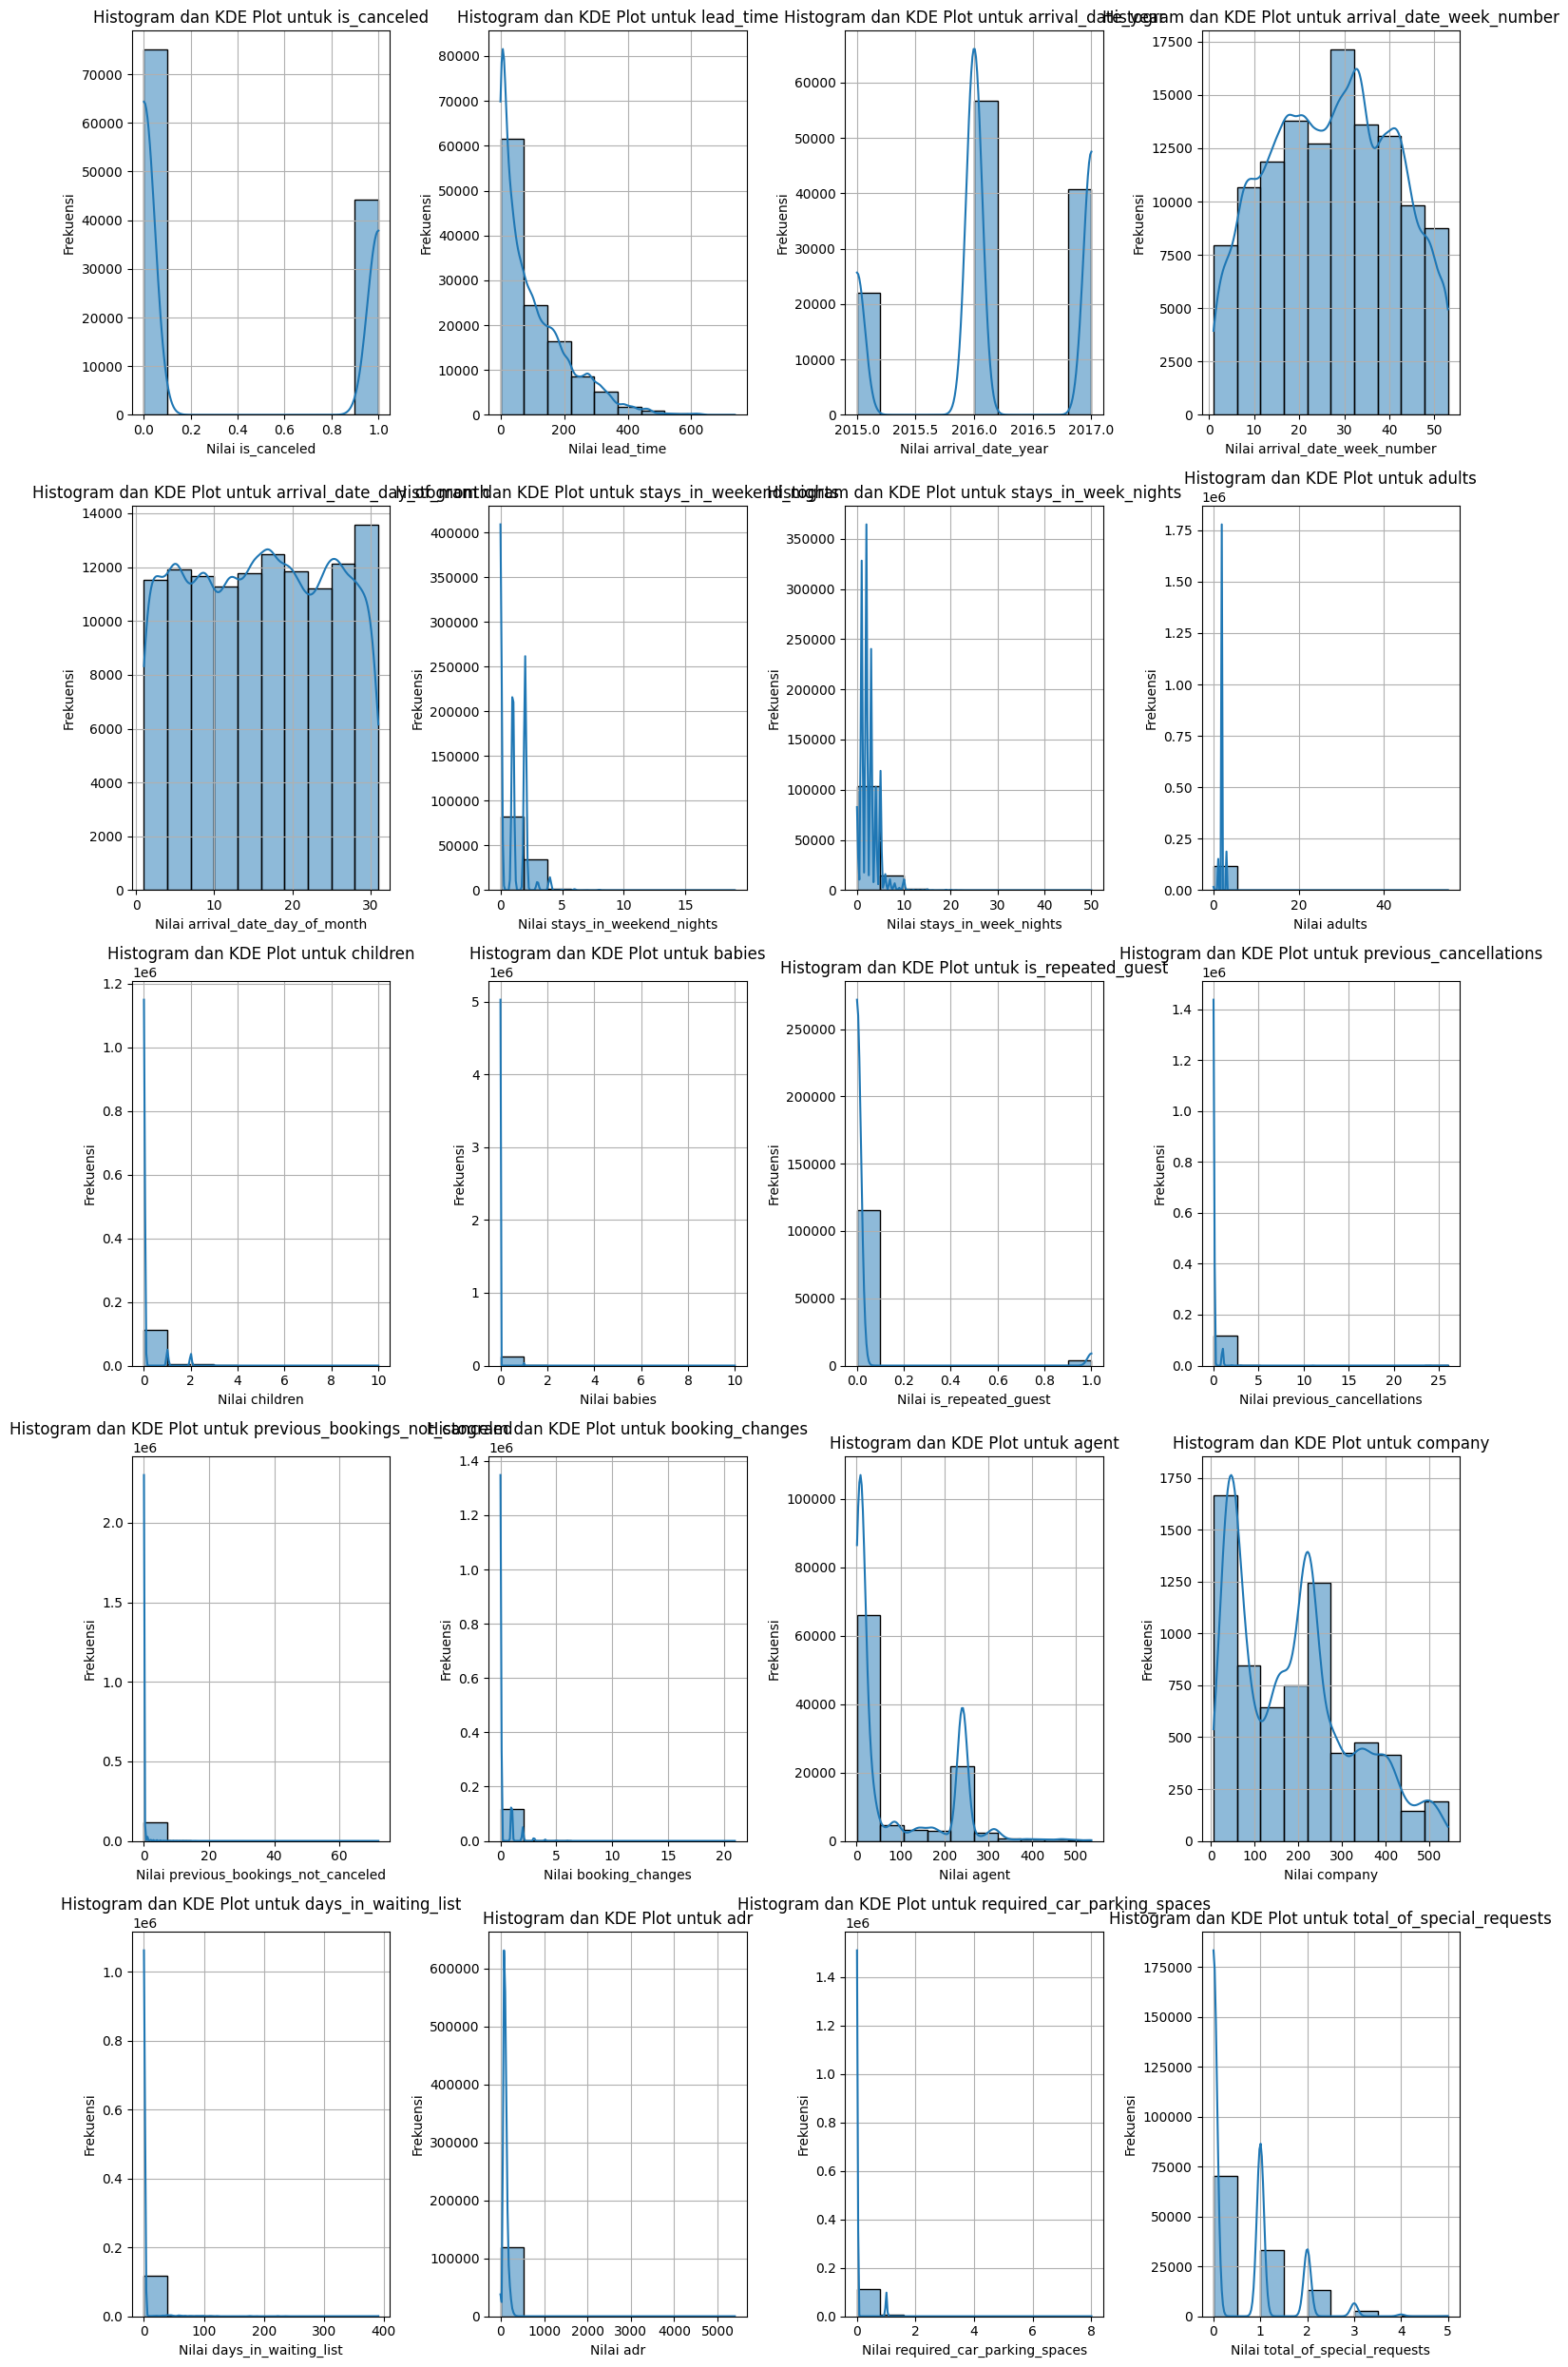

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Menentukan jumlah kolom dan baris untuk layout
num_cols = 4  # jumlah kolom dalam satu baris
num_rows = int(np.ceil(len(df.select_dtypes(include=['float64', 'int64']).columns) / num_cols))  # menghitung jumlah baris

# Membuat figure dan axes untuk subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Meratakan array axes agar lebih mudah diakses
axes = axes.flatten()

# Loop untuk semua kolom numerik
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    ax = axes[i]  # memilih axis untuk subplot
    sns.histplot(df[column], kde=True, bins=10, ax=ax)
    ax.set_title(f'Histogram dan KDE Plot untuk {column}')
    ax.set_xlabel(f'Nilai {column}')
    ax.set_ylabel('Frekuensi')
    ax.grid(True)

# Menghapus subplot yang tidak digunakan jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar tidak ada elemen yang terpotong
plt.tight_layout()
plt.show()


In [18]:
# Cek Missing Values

df.isnull().sum().sort_values(ascending=False)


company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [19]:
# Mengubah kolom 'agent' yang null menjadi modus
mode_agent = df['agent'].mode()[0]
df['agent'] = df['agent'].fillna(mode_agent)

# Mengubah kolom 'country' yang null menjadi modus
mode_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(mode_country)

# Mengubah kolom 'children' yang null menjadi 0
df['children'] = df['children'].fillna(0)

In [20]:
# Melakukan drop kolom 'company'
df = df.drop('company', axis=1)

In [21]:
# Cek Missing Values

df.isnull().sum().sort_values(ascending=False).head()

hotel                          0
is_repeated_guest              0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [22]:
# Drop duplicate

print("Baris sebelum duplicate:", len(df))
df.drop_duplicates(inplace=True)
print("Rows setelah duplicate", len(df))
df.reset_index(drop=True, inplace=True)

Baris sebelum duplicate: 119390
Rows setelah duplicate 87369


In [23]:
# Melakukan drop pada tamu yang 0

zero_guests_df = df.loc[df["adults"]
                   + df["children"]
                   + df["babies"] == 0].index

print(len(zero_guests_df))

# Drop 0 tamu

print("Baris sebelum drop 0 tamu:", len(df))
df.drop(df.index[zero_guests_df], axis=0, inplace=True)
print("Baris setelah drop 0 tamu:", len(df))
df.reset_index(drop=True, inplace=True)

166
Baris sebelum drop 0 tamu: 87369
Baris setelah drop 0 tamu: 87203


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87203 entries, 0 to 87202
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87203 non-null  object 
 1   is_canceled                     87203 non-null  int64  
 2   lead_time                       87203 non-null  int64  
 3   arrival_date_year               87203 non-null  int64  
 4   arrival_date_month              87203 non-null  object 
 5   arrival_date_week_number        87203 non-null  int64  
 6   arrival_date_day_of_month       87203 non-null  int64  
 7   stays_in_weekend_nights         87203 non-null  int64  
 8   stays_in_week_nights            87203 non-null  int64  
 9   adults                          87203 non-null  int64  
 10  children                        87203 non-null  float64
 11  babies                          87203 non-null  int64  
 12  meal                            

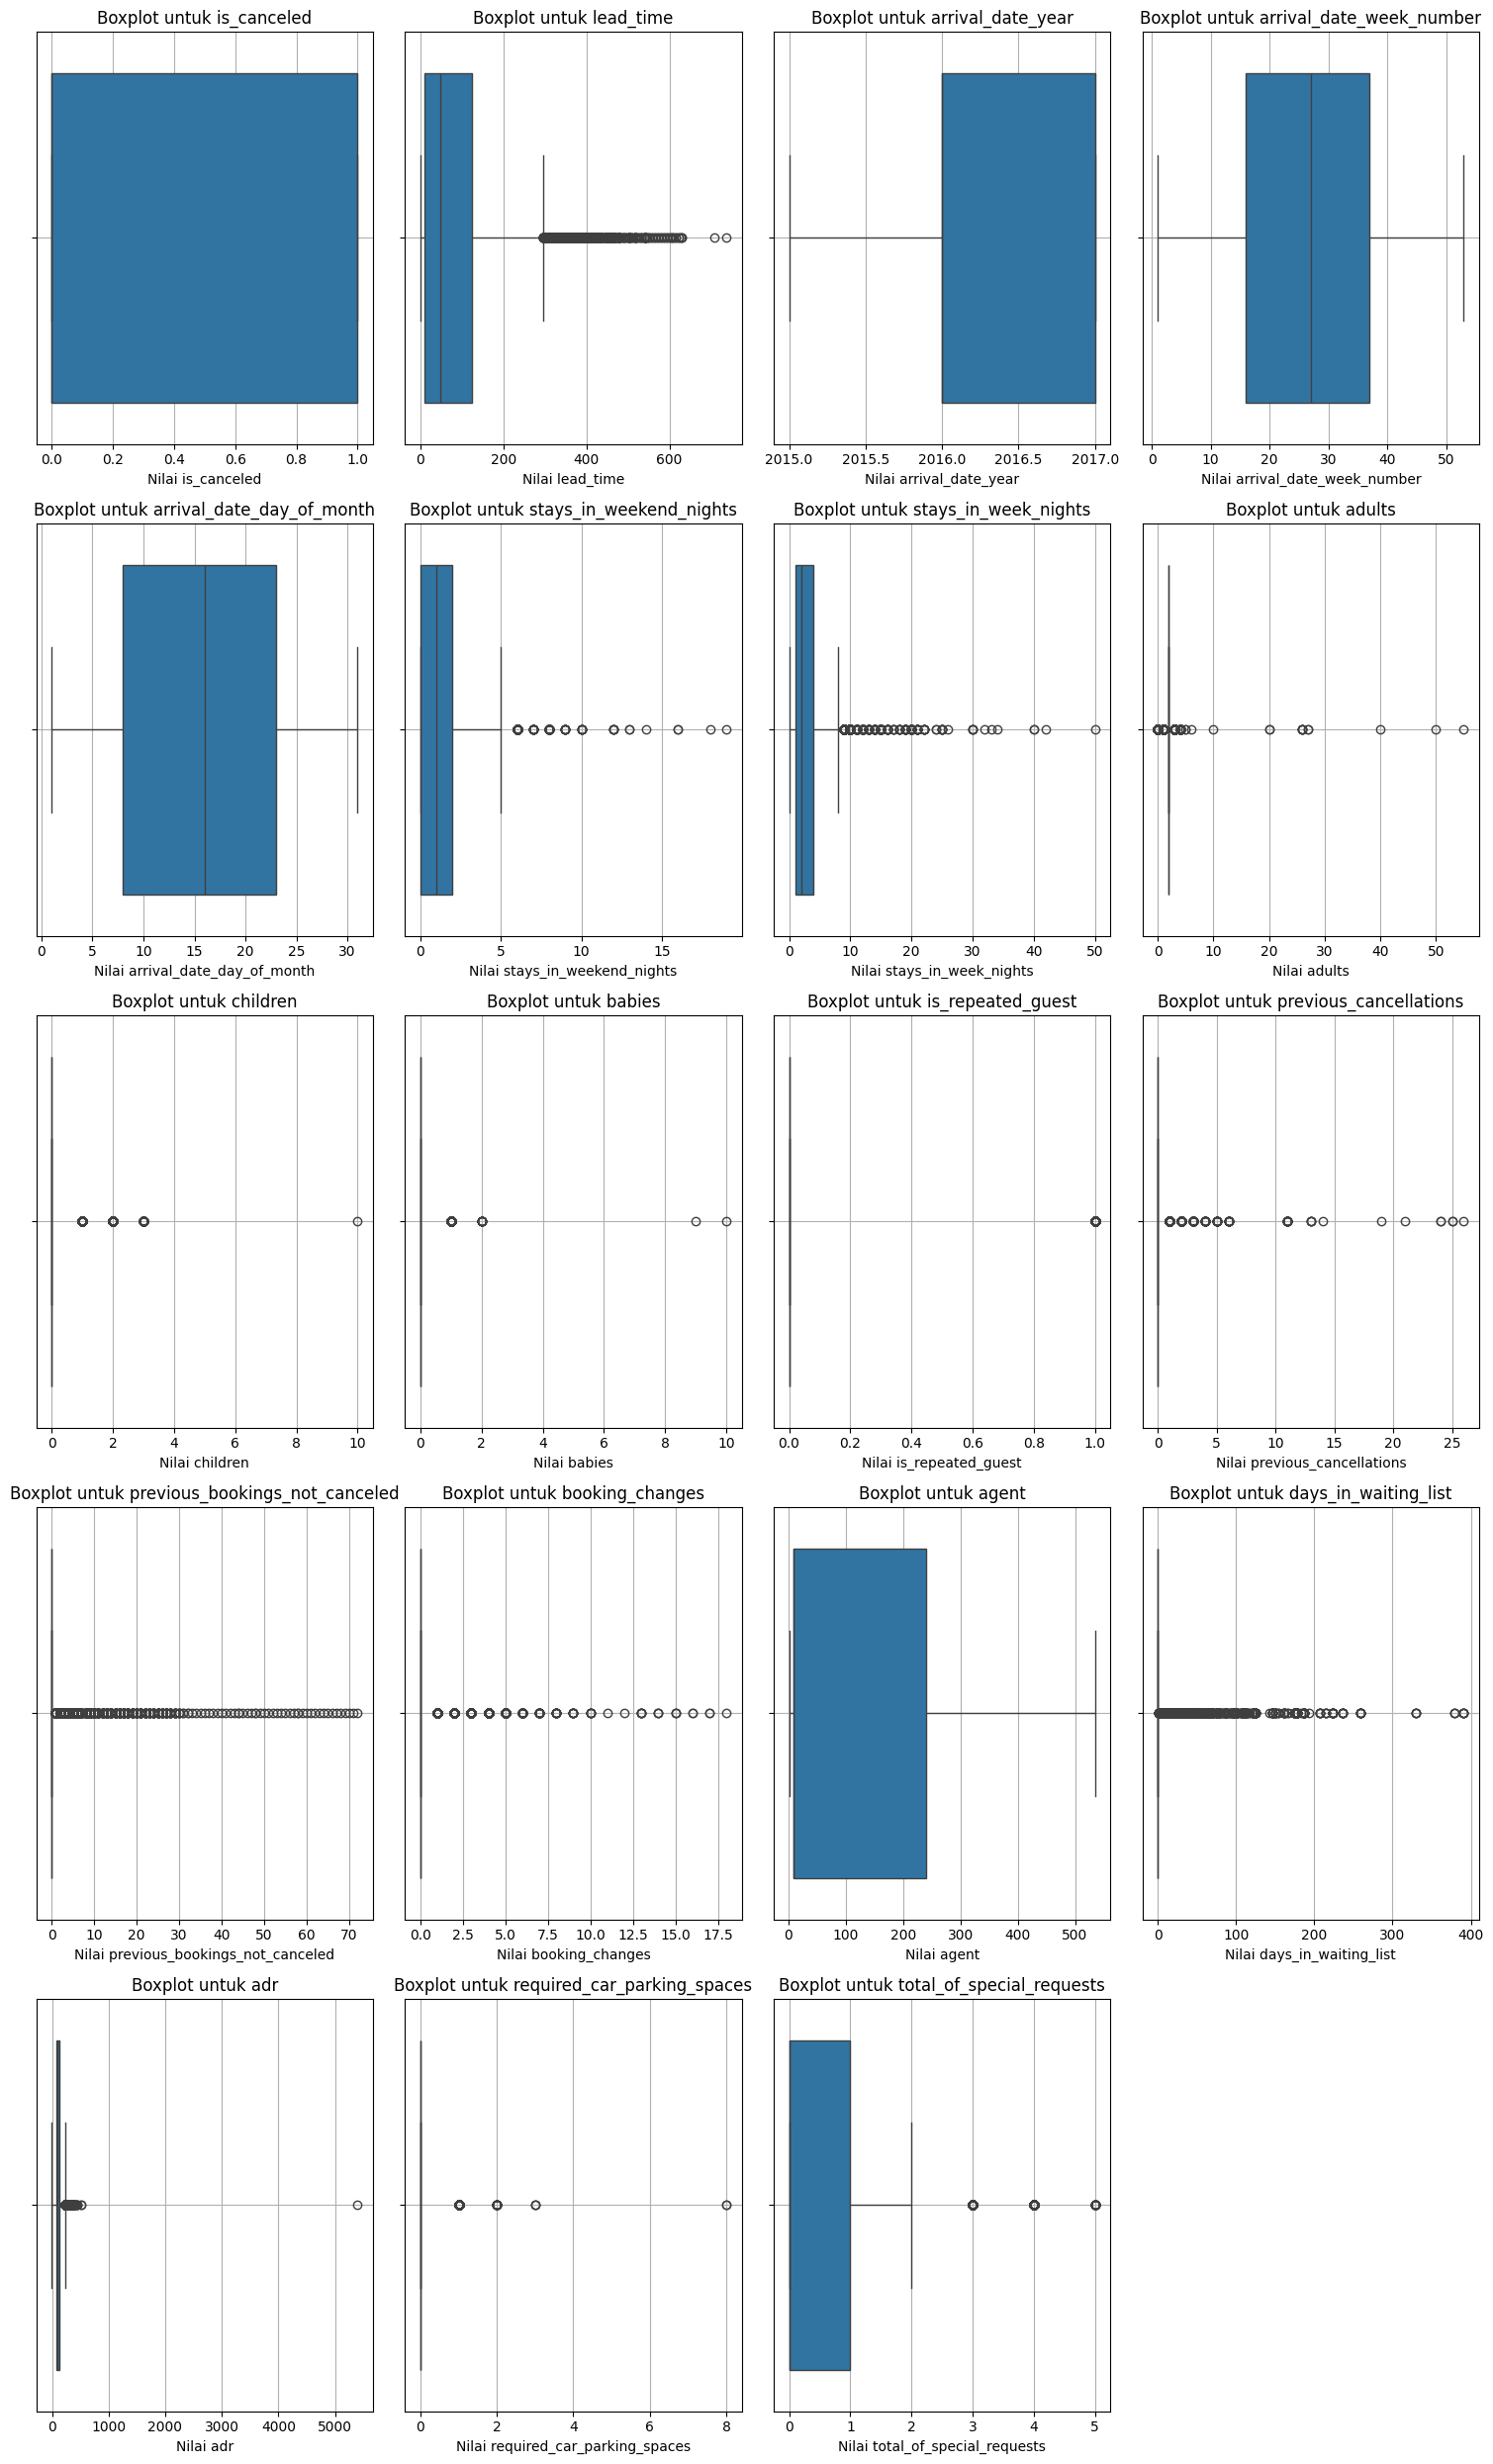

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Menentukan jumlah kolom dan baris untuk layout
num_cols = 4  # jumlah kolom dalam satu baris
num_rows = int(np.ceil(len(df.select_dtypes(include=['float64', 'int64']).columns) / num_cols))  # menghitung jumlah baris

# Membuat figure dan axes untuk subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Meratakan array axes agar lebih mudah diakses
axes = axes.flatten()

# Loop untuk semua kolom numerik
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    ax = axes[i]  # memilih axis untuk subplot
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(f'Boxplot untuk {column}')
    ax.set_xlabel(f'Nilai {column}')
    ax.grid(True)

# Menghapus subplot yang tidak digunakan jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar tidak ada elemen yang terpotong
plt.tight_layout()
plt.show()


In [28]:
# Feature Engineering

In [29]:
# Membuat countries yang banyak menjadi 10 saja dan sisanya others

n_countries = 10
most_freq_countries = df['country'].value_counts()[:n_countries].index
df['country'].value_counts()[:n_countries]

df['country'] = df['country'].apply(lambda x: x if x in most_freq_countries else 'Others')

In [30]:
# Membuat company yang banyak menjadi 10 saja dan sisanya others

n_agents = 10
most_freq_agent = df['agent'].value_counts()[:n_agents].index
df['agent'].value_counts()[:n_agents]

df['agent'] = df['agent'].apply(lambda x: x if x in most_freq_agent else 'Others')

C:\Users\Iskandar\AppData\Local\Temp\ipykernel_10848\2463387029.py:4: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  most_freq_agent = df['agent'].value_counts()[:n_agents].index
C:\Users\Iskandar\AppData\Local\Temp\ipykernel_10848\2463387029.py:5: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df['agent'].value_counts()[:n_agents]


In [31]:
# Definisikan mapping bulan ke kuartal
month_to_quarter = {
    'January': 'Quarter_1',
    'February': 'Quarter_1',
    'March': 'Quarter_1',
    'April': 'Quarter_2',
    'May': 'Quarter_2',
    'June': 'Quarter_2',
    'July': 'Quarter_3',
    'August': 'Quarter_3',
    'September': 'Quarter_3',
    'October': 'Quarter_4',
    'November': 'Quarter_4',
    'December': 'Quarter_4'
}

# Buat kolom baru dengan mapping
df['arrival_date_quarter'] = df['arrival_date_month'].map(month_to_quarter)

In [32]:
# Buat kolom baru 'total_orang' dengan menjumlahkan 'adults', 'children', dan 'babies'
df['total_orang'] = df['adults'] + df['children'] + df['babies']

In [33]:
# Fungsi untuk mengubah kategori menjadi numerik
def categorical_to_numeric(df):
    for column in df.select_dtypes(include=['object']).columns:
        # Mengambil kategori unik dari kolom
        unique_categories = df[column].unique()
        
        # Membuat dictionary mapping kategori ke angka
        category_map = {category: idx for idx, category in enumerate(unique_categories)}
        
        # Mengubah kolom berdasarkan mapping
        df[column] = df[column].map(category_map)
    
    return df

# Mengubah semua kolom kategorikal menjadi numerik
df = categorical_to_numeric(df)

In [34]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_quarter,total_orang
0,0,0,342,2015,0,27,1,0,0,2,...,0,0,0,0.0,0,0,0,0,0,2.0
1,0,0,737,2015,0,27,1,0,0,2,...,0,0,0,0.0,0,0,0,0,0,2.0
2,0,0,7,2015,0,27,1,0,1,1,...,0,0,0,75.0,0,0,0,1,0,1.0
3,0,0,13,2015,0,27,1,0,1,1,...,1,0,0,75.0,0,0,0,1,0,1.0
4,0,0,14,2015,0,27,1,0,2,2,...,2,0,0,98.0,0,1,0,2,0,2.0


In [35]:
# Outlier remover
def remove_outlier(data, col):
    # Determine IQR for column
    col_values = data[col].values
    q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('IQR: {}'.format(iqr))
    print()

    # Determine the cut off (IQR * 1.5)
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print('Lower bound: {}'.format(lower))
    print('Upper bound: {}'.format(upper))
    print()

    # Examine instances before removal
    print("Number of instances before removal: {}".format(len(data)))

    # Remove outliers
    data = data.drop(data[(data[col] > upper) | (data[col] < lower)].index)

    # Examine instances after removal
    print("Number of instances after removal: {}".format(len(data)))
    print()

    return data

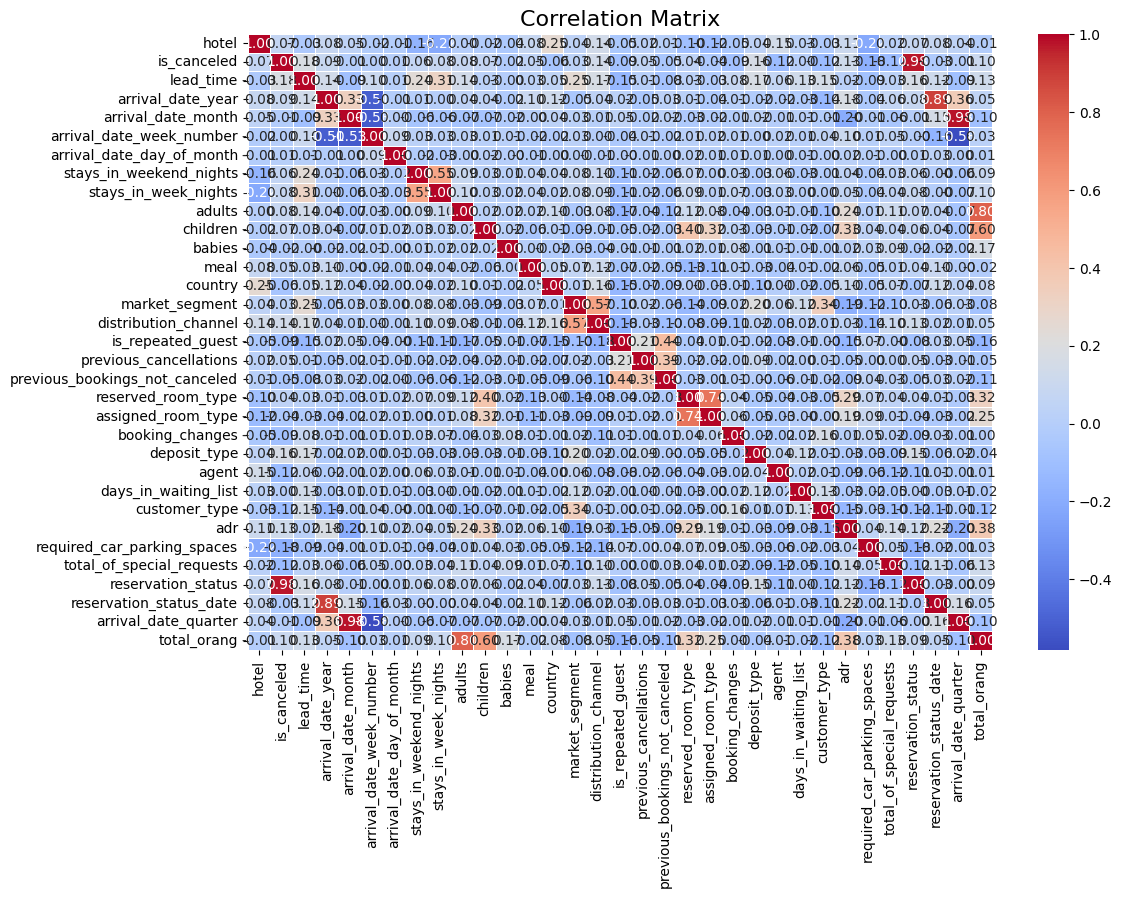

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung correlation matrix
correlation_matrix = df.corr()

# Membuat heatmap untuk correlation matrix
plt.figure(figsize=(12, 8))  # Ukuran gambar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [37]:
# Cek korelasi dengan kolom 'is_canceled'

df.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
reservation_status                0.975277
lead_time                         0.184394
deposit_type                      0.162638
distribution_channel              0.140191
adr                               0.127202
total_orang                       0.098852
arrival_date_year                 0.088022
stays_in_week_nights              0.084047
adults                            0.080131
hotel                             0.072082
children                          0.067137
stays_in_weekend_nights           0.060867
previous_cancellations            0.051491
meal                              0.046048
reserved_room_type                0.039147
market_segment                    0.033961
arrival_date_day_of_month         0.005423
days_in_waiting_list              0.004698
arrival_date_week_number          0.001648
arrival_date_quarter             -0.006797
arrival_date_month               -0.009186
babies                           -0.020644
reservation

In [38]:
# Melakukan drop untuk data yang tidak bisa dipakai (Data yang sudah terjadi)
df = df.drop('reservation_status', axis=1)
df = df.drop('reservation_status_date', axis=1)
df = df.drop('adr', axis=1)
df = df.drop('assigned_room_type', axis=1)

In [39]:
# Cek korelasi dengan kolom 'is_canceled'

df.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.184394
deposit_type                      0.162638
distribution_channel              0.140191
total_orang                       0.098852
arrival_date_year                 0.088022
stays_in_week_nights              0.084047
adults                            0.080131
hotel                             0.072082
children                          0.067137
stays_in_weekend_nights           0.060867
previous_cancellations            0.051491
meal                              0.046048
reserved_room_type                0.039147
market_segment                    0.033961
arrival_date_day_of_month         0.005423
days_in_waiting_list              0.004698
arrival_date_week_number          0.001648
arrival_date_quarter             -0.006797
arrival_date_month               -0.009186
babies                           -0.020644
previous_bookings_not_canceled   -0.052199
country                          -0.064765
is_repeated

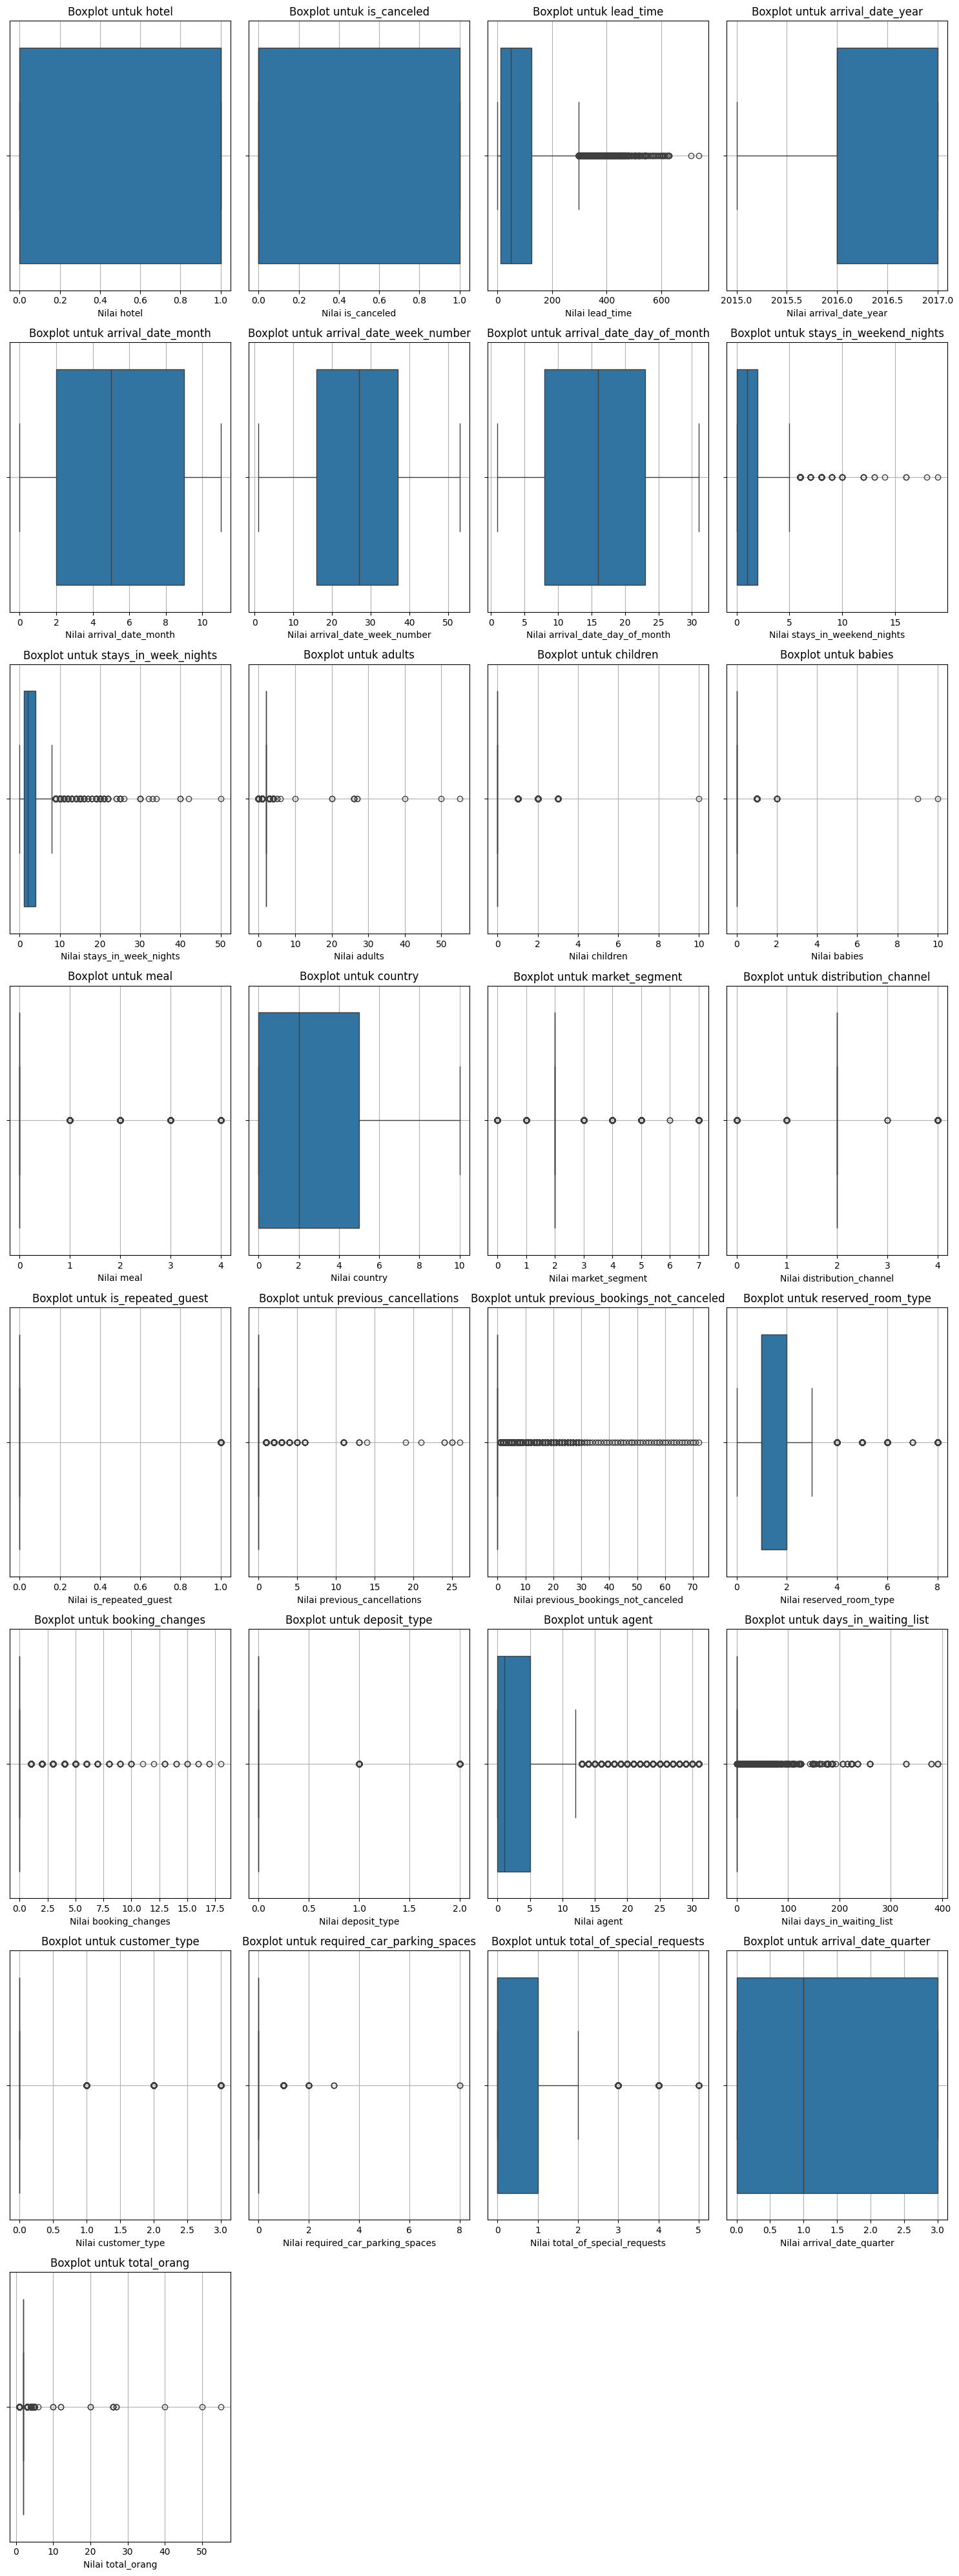

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Menentukan jumlah kolom dan baris untuk layout
num_cols = 4  # jumlah kolom dalam satu baris
num_rows = int(np.ceil(len(df.select_dtypes(include=['float64', 'int64']).columns) / num_cols))  # menghitung jumlah baris

# Membuat figure dan axes untuk subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Meratakan array axes agar lebih mudah diakses
axes = axes.flatten()

# Loop untuk semua kolom numerik
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    ax = axes[i]  # memilih axis untuk subplot
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(f'Boxplot untuk {column}')
    ax.set_xlabel(f'Nilai {column}')
    ax.grid(True)

# Menghapus subplot yang tidak digunakan jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar tidak ada elemen yang terpotong
plt.tight_layout()
plt.show()


In [41]:
# Remove outlier